In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/bank-additional-full.csv" , sep=";")     # if sep was not there then the data should be in wrong format
                                                                    # If the separator between each field of your data is not a comma, use the sep argument
                                                                    # sep is more commonly used than delimiter
                                                                    # header to specify which line in your data is to be considered as header
                                                                    # Use the names attribute if you would want to specify column names to the dataframe explicitly.
                                                                    # index_col Use this argument to specify the row labels to use
                                                                    # Use pandas usecols when you want to load specific columns into dataframe .You can also use column index positions as parameter to usecols
                                                                    ### for further visit this link https://honingds.com/blog/pandas-read_csv/

In [90]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [91]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


 **Imputation**

 check any null values are present or not
 

In [92]:
data.isnull().sum()                     # method1


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [93]:
data.isna().any()                        # method2

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

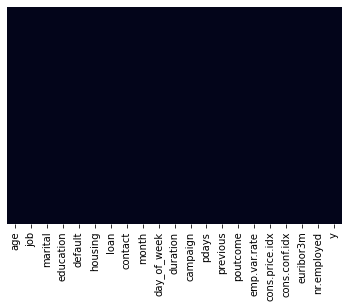

In [94]:
import seaborn as sns                                                          # method3
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

**Handling Outliers**

**Binning**

**log transformation**

In [0]:
# run the model after log transfromation check the improvmet

**one hot encoding**

In [96]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [0]:
##############################################  GETTING X Y DATA   #############################################

In [0]:
data2=data.drop('y',1,inplace=False)  # here we gating x data
X = data2

In [100]:
X.shape

(41188, 20)

In [0]:
Y = data['y']

In [102]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [103]:
data.dtypes                 # if the datatype is oblect then its a categorial data

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [104]:
data.shape

(41188, 21)

In [0]:
cat_features=[i for i in data.columns if data.dtypes[i]=='object']

In [0]:
cat_features1=[i for i in X.columns if data.dtypes[i]=='object']           ###########################################

In [107]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [108]:
cat_features1

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [0]:
final_data = data

In [0]:
def category_onehot_multcols(multcolumns):
    df_final=final_data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_data[fields])
        
        final_data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_data,df_final],axis=1)
        
    return df_final

In [111]:
final_data=category_onehot_multcols(cat_features)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [0]:
def category_onehot_multcols(multcolumns):
    df_final=X
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(X[fields])
        
        X.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([X,df_final],axis=1)
        
    return df_final

In [113]:
X=category_onehot_multcols(cat_features1)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [114]:
final_data.shape   # data shape changed due to drop_first = True

(41188, 65)

In [115]:
X.dtypes

age            int64
duration       int64
campaign       int64
pdays          int64
previous       int64
               ...  
tue            uint8
wed            uint8
failure        uint8
nonexistent    uint8
success        uint8
Length: 63, dtype: object

after one hot encoding (41188, 21) changes to (41188, 54)

In [116]:
final_data.head()  # (41188, 21) changes to (41188, 54)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,unknown,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,no,unknown,yes,no,unknown,yes,no,unknown,yes,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,no,yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [117]:
final_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success', 'no', 'yes'],
      dtype='object')

In [118]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'],
      dtype='object')

In [0]:
updated_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'd_no', 'd_unknown',
       'd_yes', 'h_no', 'h_unknown', 'h_yes', 'l_no', 'l_unknown', 'l_yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success', 'y_no', 'y_yes']

In [0]:
updated_col1 = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'job_unknown', 'divorced', 'married', 'single', 'ma_unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'e_unknown', 'd_no', 'd_unknown',
       'd_yes', 'h_no', 'h_unknown', 'h_yes', 'l_no', 'l_unknown', 'l_yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success']

In [0]:
final_data.columns = updated_col

In [0]:
X.columns = updated_col1

In [123]:
final_data.columns        # after updation of column

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'd_no',
       'd_unknown', 'd_yes', 'h_no', 'h_unknown', 'h_yes', 'l_no', 'l_unknown',
       'l_yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed',
       'failure', 'nonexistent', 'success', 'y_no', 'y_yes'],
      dtype='object')

In [147]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'job_unknown', 'divorced', 'married', 'single', 'ma_unknown',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'e_unknown', 'd_no',
       'd_unknown', 'd_yes', 'h_no', 'h_unknown', 'h_yes', 'l_no', 'l_unknown',
       'l_yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed',
       'failure', 'nonexistent', 'success'],
      dtype='object')

In [0]:
#########  know solved one hot encoding issue know X,Y  ###########################

**scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
final_data1 = sc_X.fit_transform(final_data)

In [0]:
from sklearn.preprocessing import StandardScaler                          ###########################
sc_X = StandardScaler()
X1 = sc_X.fit_transform(X)

In [0]:
final_data2 = pd.DataFrame(data=final_data1, columns=final_data.columns)          # OUTPUT is ndarry thatswhy

In [0]:
X1 = pd.DataFrame(data=X1, columns=X.columns)          ##########################

In [130]:
final_data1

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [131]:
final_data2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,unknown,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,d_no,d_unknown,d_yes,h_no,h_unknown,h_yes,l_no,l_unknown,l_yes,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success,y_no,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,6.152772,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,2.977084,-0.242748,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857,0.356309,-0.356309
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,-1.946613,1.947042,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857,0.356309,-0.356309
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,-0.908418,-0.156933,0.953401,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857,0.356309,-0.356309
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.718146,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,4.119506,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857,0.356309,-0.356309
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,-2.165761,-0.156933,2.364781,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857,0.356309,-0.356309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,

trying using basic regression using sklearn


In [133]:
final_data2['y_yes']

0       -0.356309
1       -0.356309
2       -0.356309
3       -0.356309
4       -0.356309
           ...   
41183    2.806550
41184   -0.356309
41185   -0.356309
41186    2.806550
41187   -0.356309
Name: y_yes, Length: 41188, dtype: float64

In [134]:
 final_data2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'd_no',
       'd_unknown', 'd_yes', 'h_no', 'h_unknown', 'h_yes', 'l_no', 'l_unknown',
       'l_yes', 'cellular', 'telephone', 'apr', 'aug', 'dec', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed',
       'failure', 'nonexistent', 'success', 'y_no', 'y_yes'],
      dtype='object')

1st check

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.25)


In [154]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [152]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
Y= label_encoder.fit_transform(Y)
Y = pd.DataFrame(Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.36438740167451633


In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

In [156]:
xgb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
preds = xgb.predict(X_test)

In [0]:
preds = pd.DataFrame(preds)

In [167]:
preds

,0
0,0
1,0
2,0
3,0
4,0
...,...
10292,0
10293,0
10294,0
10295,0


In [169]:
y_test

,0
26648,0
2548,0
11620,0
18188,0
24383,0
...,...
35173,0
22731,0
5223,0
12399,0


In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9162862969797029